<a href="https://colab.research.google.com/github/Gh0st116/Petfinder/blob/main/WnB_Inceptionv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!rm -rf sample_data

# Download dataset from kaggle
!pip install opendatasets
!pip install pandas

import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/competitions/dog-breed-identification/")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 691M/691M [00:30<00:00, 23.4MB/s]



Extracting archive ./dog-breed-identification/dog-breed-identification.zip to ./dog-breed-identification


In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('dog-breed-identification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

A saída de streaming foi truncada nas últimas 5000 linhas.
dog-breed-identification/train/e20e32bf114141e20a1af854ca4d0ecc.jpg
dog-breed-identification/train/842e3c6e44fda4102fe83d07dac72b3e.jpg
dog-breed-identification/train/ae9566fed2f45407a4282a6677652c0f.jpg
dog-breed-identification/train/1feb929715c1e47b1cd7f6442ed75e51.jpg
dog-breed-identification/train/1cf650efe8efbadf87c1fd3c12dbdd05.jpg
dog-breed-identification/train/a744f11051daf6c9bddc47fd757d0bb6.jpg
dog-breed-identification/train/616d856ae608a00523d0b39f0a40d264.jpg
dog-breed-identification/train/9cce979c602d678cb93a97f8e69a6070.jpg
dog-breed-identification/train/98b6235a39ffbd772524aae2c4e1b3ab.jpg
dog-breed-identification/train/0365fe4e3e13a885c6b02ebbbf2d9173.jpg
dog-breed-identification/train/058d4bfce39c9f1157ca4c1b019bbf1a.jpg
dog-breed-identification/train/356af0796a079ee87656eb7b25fbf293.jpg
dog-breed-identification/train/bf78b7ca10cf7d1b7769d5538374a524.jpg
dog-breed-identification/train/92d66c4265d4697642d27fcece

In [ ]:
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.4 MB/s eta 0:00:00


In [ ]:
%%time
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools
import re
import matplotlib.pyplot as plt
%matplotlib inline

CPU times: user 3.66 s, sys: 364 ms, total: 4.02 s
Wall time: 4.25 s


In [ ]:
%%time
train_dir = 'dog-breed-identification/train'
test_dir ='dog-breed-identification/test'

CPU times: user 23 µs, sys: 6 µs, total: 29 µs
Wall time: 33.4 µs


In [ ]:
%%time
def append_ext(fn):
    return fn+".jpg"
traindf = pd.read_csv('dog-breed-identification/labels.csv',dtype=str)
testdf = pd.read_csv('dog-breed-identification/sample_submission.csv',dtype=str)
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)


CPU times: user 354 ms, sys: 45.4 ms, total: 399 ms
Wall time: 619 ms


In [ ]:
traindf.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [ ]:
testdf.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
1,00102ee9d8eb90812350685311fe5890.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
2,0012a730dfa437f5f3613fb75efcd4ce.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
3,001510bc8570bbeee98c8d80c8a95ec1.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333
4,001a5f3114548acdefa3d4da05474c2e.jpg,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,...,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333,0.00833333333333333


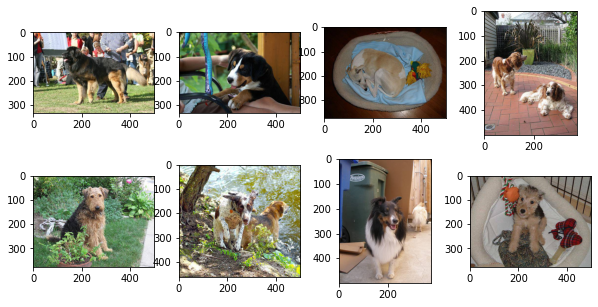

In [ ]:

src_path = "dog-breed-identification/train"
sub_class = os.listdir(src_path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:8])):
    plt.subplot(2,4,e+1)
    img = plt.imread(os.path.join(src_path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

# Data preprocessing

In [ ]:
%%time
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  #rotation_range = 20,
                                  #brightness_range=[0.2,1.0], SEM DIFERENCA SIGNIFICATIVA
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 2%
                                  validation_split=0.02
                                  )

CPU times: user 83 µs, sys: 19 µs, total: 102 µs
Wall time: 109 µs


In [ ]:
BATCH_SIZE = 128

In [ ]:
image_size=(299,299)

In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb"
)

Found 10018 validated image filenames belonging to 120 classes.


# Plotting Augmented images

In [ ]:
x,y = next(train_generator)

In [ ]:
print(type(x))
print(x.shape)
print(y.shape)

<class 'numpy.ndarray'>
(128, 299, 299, 3)
(128, 120)


In [ ]:
def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')


CPU times: user 1.75 s, sys: 44.1 ms, total: 1.79 s
Wall time: 1.81 s


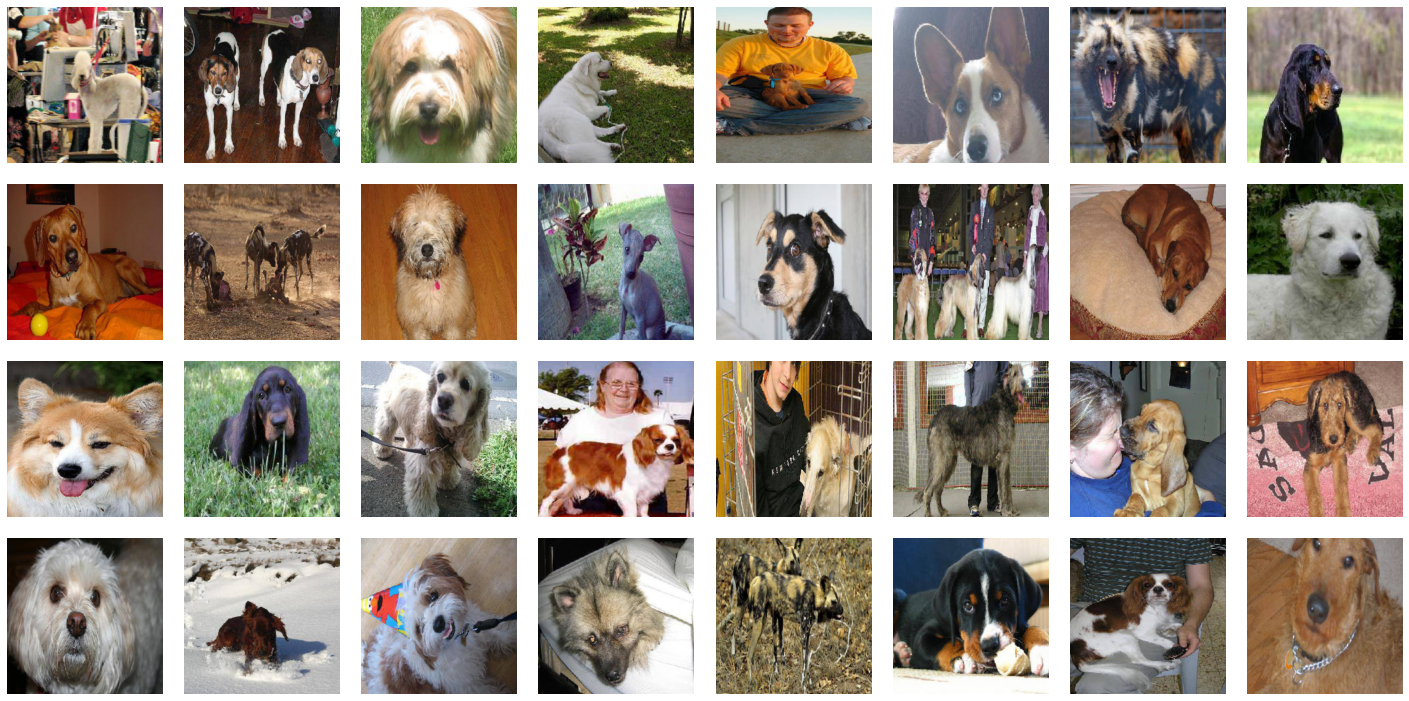

In [ ]:
%%time
show_grid(x,4,8,figsize=(25,25))


# Validation Data

In [ ]:
valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")


Found 204 validated image filenames belonging to 120 classes.


# Test Data

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=42,
shuffle=False,
class_mode=None,
target_size=image_size,
color_mode="rgb")

Found 10357 validated image filenames.


# Pretrained model InceptionV3

In [ ]:
shape=[299,299,3]

In [ ]:
pretrained_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
pretrained_model.trainable = False

# Model Checkpoint
checkpoint_filepath = './Checkpoints/checkpoint_InceptionV3'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        #tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
# opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


# Configuring Weights and Biases API

In [ ]:
!pip install wandb

import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

!wandb login

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.5 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=a7b7d756085d62bb9a57734c5a430f28d5eb71d66b7f06671af5a36821f9e244
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or pr

In [ ]:
# Start a run, tracking hyperparameters
run = wandb.init(project="wandb-inceptionv3",
                 # track hyperparameters and run metadata with wandb.config
                 config={
                      "optimizer": "adam",
                      "learning_rate": 0.0001,
                      "loss_function": "categorical_crossentropy",
                      "metric": "accuracy",
                      "epoch": 50,
                      "batch_size": BATCH_SIZE,
                      "architecture": "inceptionV3"
                 }
    )

config = wandb.config

wandb: Currently logged in as: pablo-jp116. Use `wandb login --relogin` to force relogin


In [ ]:
# Checkpoint
wandb_check = WandbModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True
)

wandb: WARNING When using `save_best_only`, ensure that the `filepath` argument contains formatting placeholders like `{epoch:02d}` or `{batch:02d}`. This ensures correct interpretation of the logged artifacts.


# Early stopping

In [ ]:
#reduce = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',factor=0.2,patience=5, min_lr=0.001 )

early = tf.keras.callbacks.EarlyStopping( patience=5,
                                          min_delta=0.001,
                                          restore_best_weights=True)

# Fitting the Model

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    # callbacks=[early, model_checkpoint_callback, ],
                    callbacks=[
                        early,
                        WandbMetricsLogger(),
                        WandbModelCheckpoint("models")
                    ],
                    )

Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 4.3631 - accuracy: 0.1462

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 309s 4s/step - loss: 4.3631 - accuracy: 0.1462 - val_loss: 3.8259 - val_accuracy: 0.4141
Epoch 2/50
78/78 [==============================] - ETA: 0s - loss: 3.3244 - accuracy: 0.6229

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 273s 4s/step - loss: 3.3244 - accuracy: 0.6229 - val_loss: 2.9136 - val_accuracy: 0.7188
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 2.4570 - accuracy: 0.8022

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 277s 4s/step - loss: 2.4570 - accuracy: 0.8022 - val_loss: 2.1883 - val_accuracy: 0.7500
Epoch 4/50
78/78 [==============================] - ETA: 0s - loss: 1.7914 - accuracy: 0.8543

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 275s 4s/step - loss: 1.7914 - accuracy: 0.8543 - val_loss: 1.6557 - val_accuracy: 0.8203
Epoch 5/50
78/78 [==============================] - ETA: 0s - loss: 1.3280 - accuracy: 0.8757

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 273s 4s/step - loss: 1.3280 - accuracy: 0.8757 - val_loss: 1.2628 - val_accuracy: 0.8594
Epoch 6/50
78/78 [==============================] - ETA: 0s - loss: 1.0323 - accuracy: 0.8850

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 277s 4s/step - loss: 1.0323 - accuracy: 0.8850 - val_loss: 0.9992 - val_accuracy: 0.8828
Epoch 7/50
78/78 [==============================] - ETA: 0s - loss: 0.8388 - accuracy: 0.8957

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 273s 4s/step - loss: 0.8388 - accuracy: 0.8957 - val_loss: 0.8409 - val_accuracy: 0.8828
Epoch 8/50
78/78 [==============================] - ETA: 0s - loss: 0.7101 - accuracy: 0.8975

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 275s 4s/step - loss: 0.7101 - accuracy: 0.8975 - val_loss: 0.7573 - val_accuracy: 0.8516
Epoch 9/50
78/78 [==============================] - ETA: 0s - loss: 0.6203 - accuracy: 0.9051

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 275s 4s/step - loss: 0.6203 - accuracy: 0.9051 - val_loss: 0.7221 - val_accuracy: 0.8594
Epoch 10/50
78/78 [==============================] - ETA: 0s - loss: 0.5542 - accuracy: 0.9025

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 272s 3s/step - loss: 0.5542 - accuracy: 0.9025 - val_loss: 0.5884 - val_accuracy: 0.8828
Epoch 11/50
78/78 [==============================] - ETA: 0s - loss: 0.5056 - accuracy: 0.9084

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 270s 3s/step - loss: 0.5056 - accuracy: 0.9084 - val_loss: 0.5127 - val_accuracy: 0.9219
Epoch 12/50
78/78 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.9129

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 274s 4s/step - loss: 0.4660 - accuracy: 0.9129 - val_loss: 0.5302 - val_accuracy: 0.8672
Epoch 13/50
78/78 [==============================] - ETA: 0s - loss: 0.4351 - accuracy: 0.9124

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 276s 4s/step - loss: 0.4351 - accuracy: 0.9124 - val_loss: 0.4757 - val_accuracy: 0.9062
Epoch 14/50
78/78 [==============================] - ETA: 0s - loss: 0.4076 - accuracy: 0.9165

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 272s 3s/step - loss: 0.4076 - accuracy: 0.9165 - val_loss: 0.4579 - val_accuracy: 0.8906
Epoch 15/50
78/78 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.9154

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 275s 4s/step - loss: 0.3891 - accuracy: 0.9154 - val_loss: 0.3995 - val_accuracy: 0.9141
Epoch 16/50
78/78 [==============================] - ETA: 0s - loss: 0.3686 - accuracy: 0.9185

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 274s 4s/step - loss: 0.3686 - accuracy: 0.9185 - val_loss: 0.4142 - val_accuracy: 0.9453
Epoch 17/50
78/78 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.9196

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 279s 4s/step - loss: 0.3524 - accuracy: 0.9196 - val_loss: 0.4073 - val_accuracy: 0.8906
Epoch 18/50
78/78 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.9203

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 279s 4s/step - loss: 0.3393 - accuracy: 0.9203 - val_loss: 0.4154 - val_accuracy: 0.8906
Epoch 19/50
78/78 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.9223

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 278s 4s/step - loss: 0.3303 - accuracy: 0.9223 - val_loss: 0.3728 - val_accuracy: 0.8828
Epoch 20/50
78/78 [==============================] - ETA: 0s - loss: 0.3147 - accuracy: 0.9274

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 279s 4s/step - loss: 0.3147 - accuracy: 0.9274 - val_loss: 0.2989 - val_accuracy: 0.9453
Epoch 21/50
78/78 [==============================] - ETA: 0s - loss: 0.3112 - accuracy: 0.9220

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 282s 4s/step - loss: 0.3112 - accuracy: 0.9220 - val_loss: 0.4212 - val_accuracy: 0.8594
Epoch 22/50
78/78 [==============================] - ETA: 0s - loss: 0.2990 - accuracy: 0.9255

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 276s 4s/step - loss: 0.2990 - accuracy: 0.9255 - val_loss: 0.4056 - val_accuracy: 0.8984
Epoch 23/50
78/78 [==============================] - ETA: 0s - loss: 0.2893 - accuracy: 0.9290

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 277s 4s/step - loss: 0.2893 - accuracy: 0.9290 - val_loss: 0.4171 - val_accuracy: 0.8750
Epoch 24/50
78/78 [==============================] - ETA: 0s - loss: 0.2814 - accuracy: 0.9279

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 275s 4s/step - loss: 0.2814 - accuracy: 0.9279 - val_loss: 0.3413 - val_accuracy: 0.8984
Epoch 25/50
78/78 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.9289

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 279s 4s/step - loss: 0.2775 - accuracy: 0.9289 - val_loss: 0.2850 - val_accuracy: 0.9297
Epoch 26/50
78/78 [==============================] - ETA: 0s - loss: 0.2681 - accuracy: 0.9342

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 275s 4s/step - loss: 0.2681 - accuracy: 0.9342 - val_loss: 0.3625 - val_accuracy: 0.8984
Epoch 27/50
78/78 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9338

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 278s 4s/step - loss: 0.2572 - accuracy: 0.9338 - val_loss: 0.2872 - val_accuracy: 0.9297
Epoch 28/50
78/78 [==============================] - ETA: 0s - loss: 0.2525 - accuracy: 0.9340

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 283s 4s/step - loss: 0.2525 - accuracy: 0.9340 - val_loss: 0.2989 - val_accuracy: 0.9375
Epoch 29/50
78/78 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.9375

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 277s 4s/step - loss: 0.2452 - accuracy: 0.9375 - val_loss: 0.2545 - val_accuracy: 0.9453
Epoch 30/50
78/78 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.9363

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 275s 4s/step - loss: 0.2416 - accuracy: 0.9363 - val_loss: 0.2895 - val_accuracy: 0.9219
Epoch 31/50
78/78 [==============================] - ETA: 0s - loss: 0.2383 - accuracy: 0.9382

wandb: Adding directory to artifact (./models)... Done. 0.5s


78/78 [==============================] - 277s 4s/step - loss: 0.2383 - accuracy: 0.9382 - val_loss: 0.3347 - val_accuracy: 0.9062
Epoch 32/50
78/78 [==============================] - ETA: 0s - loss: 0.2376 - accuracy: 0.9372

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 272s 3s/step - loss: 0.2376 - accuracy: 0.9372 - val_loss: 0.3692 - val_accuracy: 0.8594
Epoch 33/50
78/78 [==============================] - ETA: 0s - loss: 0.2321 - accuracy: 0.9384

wandb: Adding directory to artifact (./models)... Done. 0.3s


78/78 [==============================] - 272s 3s/step - loss: 0.2321 - accuracy: 0.9384 - val_loss: 0.2723 - val_accuracy: 0.9375
Epoch 34/50
78/78 [==============================] - ETA: 0s - loss: 0.2283 - accuracy: 0.9386

wandb: Adding directory to artifact (./models)... Done. 0.4s


78/78 [==============================] - 273s 4s/step - loss: 0.2283 - accuracy: 0.9386 - val_loss: 0.2950 - val_accuracy: 0.9219


In [ ]:
# Finish weights and biases run
wandb.finish()

epoch/accuracy,▁▅▇▇▇█████████████████████████████
epoch/epoch,▁▁▁▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▅▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_accuracy,▁▅▅▆▇▇▇▇▇▇█▇▇▇██▇▇▇█▇▇▇▇█▇████▇▇██
epoch/val_loss,█▆▅▄▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,0.93862
epoch/epoch,33
epoch/learning_rate,0.0001
epoch/loss,0.22826
epoch/val_accuracy,0.92188


# Loss and Accuracy Curves

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

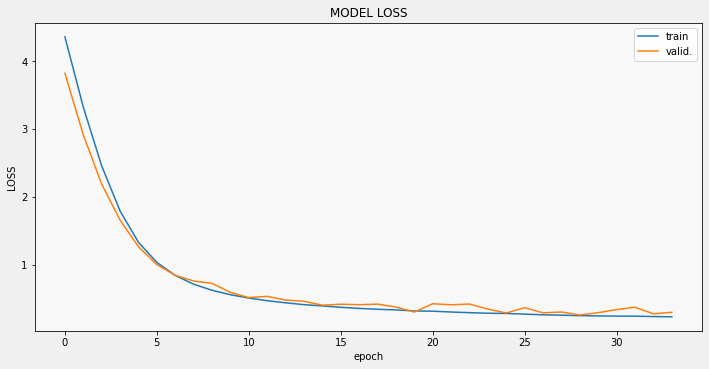

In [ ]:
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)

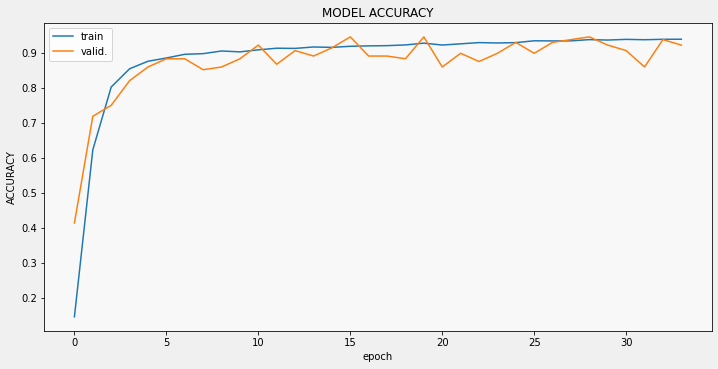

In [ ]:
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    211,
)

# Accuracy

In [ ]:
score = model.evaluate(valid_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])



2/2 [==============================] - 8s 5s/step - loss: 0.3332 - accuracy: 0.8922
Accuracy: 89.22%
Loss:  0.33315470814704895


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
Y_pred = model.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

2/2 [==============================] - 6s 2s/step


# F1 Score

In [ ]:
f_score = f1_score(valid_generator.classes,y_pred,average='macro')
print('F1 score:',f_score)


F1 score: 0.008865248226950354


# Predicting Test Images

In [ ]:
pred=model.predict(test_generator)

81/81 [==============================] - 75s 905ms/step


In [ ]:
df_submission = pd.read_csv('dog-breed-identification/sample_submission.csv')
df_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [ ]:
file_list = test_generator.filenames
id_list = []
for name in file_list:
    m = re.sub('test/', '', name)
    m = re.sub('.jpg', '', m)
    id_list.append(m)

In [ ]:
df_submission['id'] = id_list
df_submission.iloc[:,1:] = pred
df_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.000090,0.000019,0.000009,0.000009,0.000009,0.000013,0.000005,0.000014,0.000020,...,0.000017,0.000019,0.000033,0.000008,0.000020,0.000007,0.000004,0.000018,0.000022,0.000037
1,00102ee9d8eb90812350685311fe5890,0.000057,0.000019,0.000034,0.000018,0.000035,0.000120,0.000030,0.000113,0.000045,...,0.000080,0.000031,0.000055,0.000154,0.000067,0.000039,0.000371,0.000051,0.000018,0.000040
2,0012a730dfa437f5f3613fb75efcd4ce,0.000034,0.006861,0.000600,0.000121,0.000101,0.000182,0.000070,0.000108,0.000079,...,0.000079,0.000262,0.000113,0.001138,0.000131,0.001381,0.000089,0.000635,0.000376,0.000239
3,001510bc8570bbeee98c8d80c8a95ec1,0.000630,0.000027,0.000023,0.000004,0.000065,0.000047,0.000025,0.000062,0.000033,...,0.000081,0.000007,0.000099,0.000035,0.000014,0.000006,0.000013,0.000046,0.000003,0.000039
4,001a5f3114548acdefa3d4da05474c2e,0.023846,0.000164,0.000028,0.000006,0.000055,0.000124,0.000172,0.000063,0.000098,...,0.000186,0.000196,0.000286,0.000076,0.000075,0.000024,0.000082,0.000214,0.000188,0.001435


# Prediction Score for selected breeds

In [ ]:
breeds=['id','beagle','chihuahua','doberman','french_bulldog', 'golden_retriever', 'malamute','pug','saint_bernard','scottish_deerhound','tibetan_mastiff']

In [ ]:
selected_breeds = df_submission.loc[:,breeds]

In [ ]:
print('Breeds and prediction score')
selected_breeds.head()

Breeds and prediction score


,id,beagle,chihuahua,doberman,french_bulldog,golden_retriever,malamute,pug,saint_bernard,scottish_deerhound,tibetan_mastiff
0,000621fb3cbb32d8935728e48679680e,0.000009,0.000109,0.000012,0.000061,0.000030,0.000018,0.000140,0.000008,0.000011,0.000012
1,00102ee9d8eb90812350685311fe5890,0.000033,0.000049,0.000042,0.000102,0.000108,0.001391,0.000345,0.000048,0.000041,0.000134
2,0012a730dfa437f5f3613fb75efcd4ce,0.000153,0.000103,0.000138,0.000104,0.002529,0.000054,0.000168,0.000431,0.000417,0.000025
3,001510bc8570bbeee98c8d80c8a95ec1,0.000009,0.000040,0.000013,0.006703,0.000091,0.000026,0.967131,0.000013,0.000007,0.000127
4,001a5f3114548acdefa3d4da05474c2e,0.000068,0.000122,0.000103,0.000230,0.000162,0.000059,0.000544,0.000106,0.000053,0.000307


# Load model from checkpoint


In [ ]:
pretrained_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
pretrained_model.trainable = False

# Model Checkpoint
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    verbose=1,
    mode='max',
    save_best_only=True)

model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(120, activation='softmax')
    ])

# Loading checkpoint's weights
model.load_weights(checkpoint_filepath)

opti = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer = opti,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
# STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
# history = model.fit(train_generator,
#                     steps_per_epoch=STEP_SIZE_TRAIN,
#                     validation_data=valid_generator,
#                     validation_steps=STEP_SIZE_VALID,
#                     epochs=50,
#                     callbacks=[early, model_checkpoint_callback],)

In [ ]:
# Convert to TFlite model for mobile use
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)